In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import random

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
data_dir = '../input/garbage-classification/Garbage classification/Garbage classification/'

In [ ]:
Name=[]
for file in os.listdir(data_dir):
    Name+=[file]

print(Name)
print(len(Name))

['metal', 'glass', 'paper', 'trash', 'cardboard', 'plastic']
6


In [ ]:
N=[]
for i in range(len(Name)):
    N+=[i]

normal_mapping=dict(zip(Name,N))
reverse_mapping=dict(zip(N,Name))

def mapper(value):
    return reverse_mapping[value]

In [ ]:
dataset=[]
count=0
for file in os.listdir(data_dir):
    path=os.path.join(data_dir,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(60,60))
        image=img_to_array(image)
        image=image/255.0
        dataset+=[[image,count]]
    count=count+1

In [ ]:
n=len(dataset)
print(n)

2527


In [ ]:
num=[]
for i in range(n):
    num+=[i]
random.shuffle(num)
print(num[0:5])

[1681, 1145, 2136, 677, 414]


In [ ]:
data,labels=zip(*dataset)
data=np.array(data)
labels=np.array(labels)

train=data[num[0:(n//10)*8]]
trainlabel=labels[num[0:(n//10)*8]]

test=data[num[(n//10)*8:]]
testlabel=labels[num[(n//10)*8:]]

In [ ]:
trainlabel2=to_categorical(trainlabel)

In [ ]:
trainx,testx,trainy,testy=train_test_split(train,trainlabel2,test_size=0.2,random_state=44)

In [ ]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(1612, 60, 60, 3)
(404, 60, 60, 3)
(1612, 6)
(404, 6)


In [ ]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [ ]:
pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(60,60,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

74842112/74836368 [==============================] - 3s 0us/step


In [ ]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(6, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=30)

Epoch 1/30
51/51 [==============================] - 34s 431ms/step - loss: 1.6117 - accuracy: 0.3543 - val_loss: 1.3177 - val_accuracy: 0.4926
Epoch 2/30
51/51 [==============================] - 17s 342ms/step - loss: 1.2405 - accuracy: 0.5405 - val_loss: 1.1830 - val_accuracy: 0.5718
Epoch 3/30
51/51 [==============================] - 17s 336ms/step - loss: 1.1750 - accuracy: 0.5588 - val_loss: 1.1271 - val_accuracy: 0.5842
Epoch 4/30
51/51 [==============================] - 17s 337ms/step - loss: 1.0724 - accuracy: 0.6099 - val_loss: 1.1047 - val_accuracy: 0.5743
Epoch 5/30
51/51 [==============================] - 17s 335ms/step - loss: 1.0301 - accuracy: 0.6193 - val_loss: 1.0618 - val_accuracy: 0.6188
Epoch 6/30
51/51 [==============================] - 17s 340ms/step - loss: 1.0209 - accuracy: 0.6268 - val_loss: 1.0670 - val_accuracy: 0.5990
Epoch 7/30
51/51 [==============================] - 17s 336ms/step - loss: 0.9763 - accuracy: 0.6461 - val_loss: 1.0746 - val_accuracy: 0.5817

In [ ]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       0.62      0.70      0.66        66
           1       0.70      0.52      0.60        84
           2       0.73      0.80      0.76        91
           3       0.33      0.30      0.32        20
           4       0.85      0.75      0.80        73
           5       0.61      0.73      0.66        70

    accuracy                           0.68       404
   macro avg       0.64      0.63      0.63       404
weighted avg       0.69      0.68      0.68       404



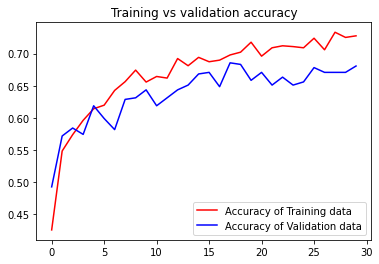

<Figure size 432x288 with 0 Axes>

In [ ]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

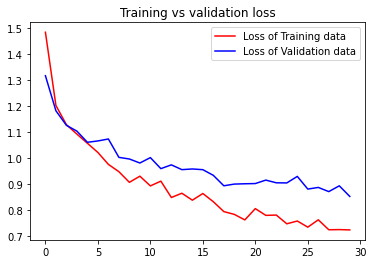

<Figure size 432x288 with 0 Axes>

In [ ]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

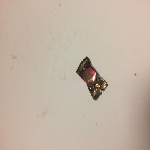

In [ ]:
load_img("../input/garbage-classification/Garbage classification/Garbage classification/trash/trash122.jpg",target_size=(150,150))

In [ ]:
image=load_img("../input/garbage-classification/Garbage classification/Garbage classification/trash/trash122.jpg",target_size=(60,60))

image=img_to_array(image)
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)

In [ ]:
prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print("Prediction is {}.".format(move_name))

Prediction is trash.


In [ ]:
print(test.shape)
pred2=model.predict(test)
print(pred2.shape)

PRED=[]
for item in pred2:
    value2=np.argmax(item)
    PRED+=[value2]

(511, 60, 60, 3)
(511, 6)


In [ ]:
ANS=testlabel

In [ ]:
accuracy=accuracy_score(ANS,PRED)
print(accuracy)

0.7045009784735812
